In [1]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.axes_grid1 import make_axes_locatable
import utils as u


In [2]:
figdir = u.get_figdir("thesis", subdir="modeling/rotativity")

In [3]:
lim = 20
B = 1
wz = np.arange(-lim, lim + 0.1, 0.1)
vx = np.arange(-lim, lim + 0.1, 0.1)

data = list(itertools.product(vx, wz))
df = pd.DataFrame(data, columns=["vx", "wz"])


In [4]:
df["vR"] = df.vx + B / 2 * df.wz
df["vL"] = df.vx - B / 2 * df.wz
df["rhos"] = (B * df.wz) / (df.vx.abs() + B * df.wz.abs())
df["rhou"] = df.rhos.abs()

In [5]:
lim = 20
vL = np.arange(-lim, lim + 0.5, 0.5)
vR = np.arange(-lim, lim + 0.5, 0.5)
B = 1

data = list(itertools.product(vL, vR))
wdf = pd.DataFrame(data, columns=["vL", "vR"])
wdf["dV"] = (wdf.vR - wdf.vL)
wdf["vX"] = (wdf.vR + wdf.vL) / 2
wdf["rhos"] = wdf.dV / (wdf.dV.abs() + wdf.vX.abs())
wdf["rhou"] = wdf.rhos.abs()

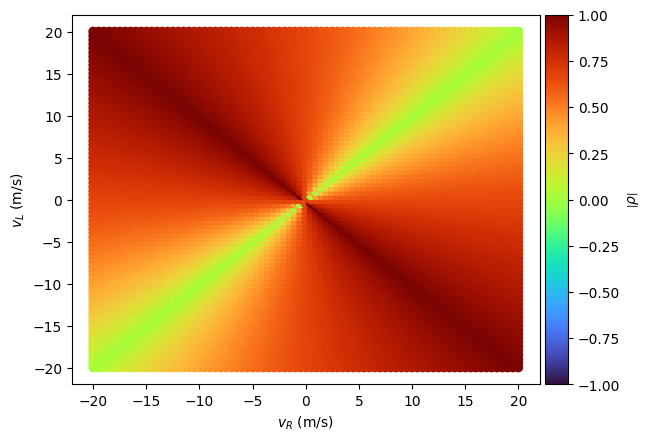

In [6]:
fig, ax = plt.subplots(rasterized=True)
sc = ax.scatter(wdf.vR, wdf.vL, c=wdf.rhou, cmap="turbo", vmin=-1.0, vmax=1.0)
ax.set_ylabel(r"${v}_{L}$ (m/s)")
ax.set_xlabel(r"${v}_{R}$ (m/s)")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(sc, cax=cax, orientation="vertical")
cb.set_label(r"$\left\vert\rho\right\vert$")

for ext in u.EXTS:
    fig.savefig(figdir / f"rho-unsigned-wheels.{ext}", bbox_inches="tight")


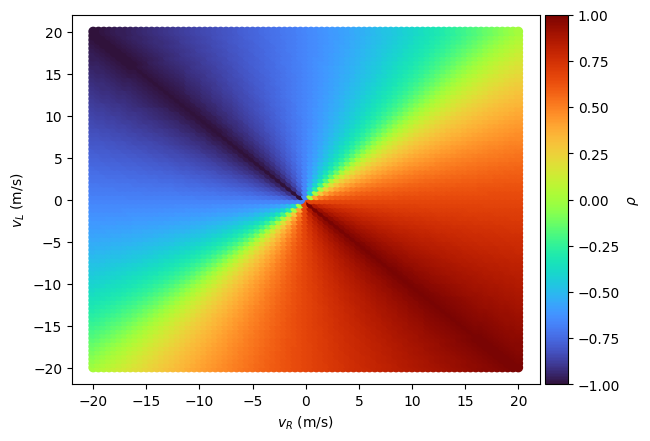

In [7]:
fig, ax = plt.subplots(rasterized=True)
sc = ax.scatter(wdf.vR, wdf.vL, c=wdf.rhos, cmap="turbo", vmin=-1., vmax=1.,)
ax.set_ylabel(r"${v}_{L}$ (m/s)")
ax.set_xlabel(r"${v}_{R}$ (m/s)")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(sc, cax=cax, orientation="vertical")
cb.set_label(r"$\rho$")

for ext in u.EXTS:
    fig.savefig(figdir / f"rho-signed-wheels.{ext}", bbox_inches="tight")


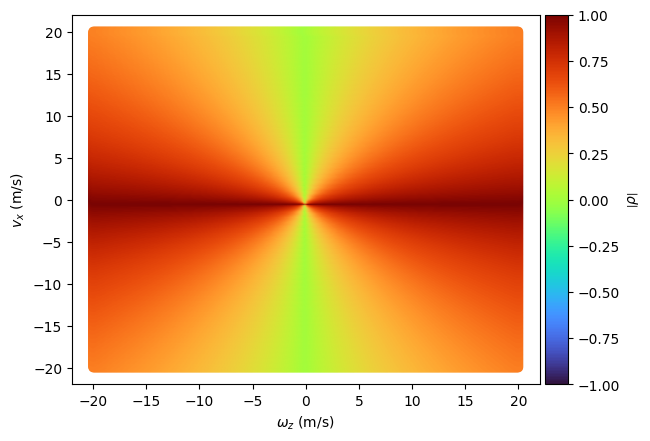

In [8]:
fig, ax = plt.subplots(rasterized=True)
sc = ax.scatter(df.wz, df.vx, c=df.rhou, cmap="turbo", vmin=-1, vmax=1)
ax.set_xlabel(r"${\omega}_{z}$ (m/s)")
ax.set_ylabel("$v_x$ (m/s)")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(sc, cax=cax, orientation="vertical")
cb.set_label(r"$\left\vert\rho\right\vert$")

for ext in u.EXTS:
    fig.savefig(figdir / f"rho-unsigned-speeds.{ext}", bbox_inches="tight")

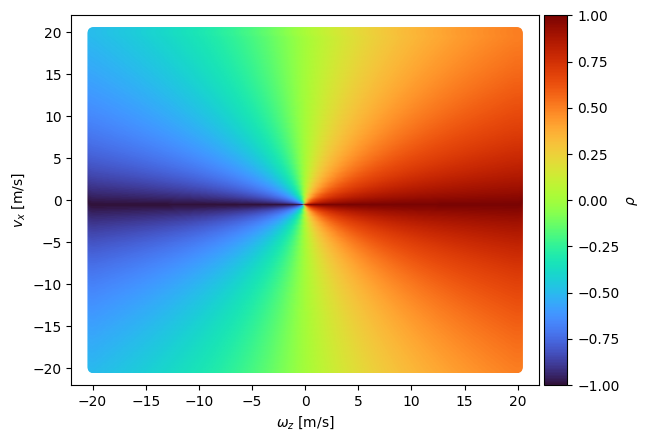

In [9]:
fig, ax = plt.subplots(rasterized=True)
sc = ax.scatter(df.wz, df.vx, c=df.rhos, cmap="turbo", vmin=-1, vmax=1)
ax.set_xlabel(r"${\omega}_{z}$ [m/s]")
ax.set_ylabel("$v_x$ [m/s]")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(sc, cax=cax, orientation="vertical")
cb.set_label(r"$\rho$")

for ext in u.EXTS:
    fig.savefig(figdir / f"rho-signed-speeds.{ext}", bbox_inches="tight")